## Лабораторная работа №3 

### Стрекнев Д. СКБ172 

### Простая хэш-функция 

In [94]:
def hash1(st):
    # принимает строку (st), возвращает хэш (Hash)
    Hash = ""
    for i in range(0,len(st),3):
        Hash = Hash + st[i]*(2**i)
    return Hash
                            

### Сложная хэш-функция 

In [95]:
def hash2(st): # Аналог rot13
    # принимает строку (st), возвращает хэш (Hash)
    Hash = ""
    for v in st:
        c = ord(v)
        if c >= ord('a') and c <= ord('z'):
            if c > ord('m'):
                c -= 13
            else:
                c += 13
        elif c >= ord('A') and c <= ord('Z'):
            if c > ord('M'):
                c -= 13
            else:
                c += 13
        Hash += chr(c)
    return Hash


### Класс "Сотрудник" 

In [96]:
class Employee:
    def __init__(self, Department, Name, Date, Position):
        self.Department = Department
        self.Name = Name
        self.Date = Date
        self.Position = Position
        self.Hash1 = hash1(self.Name)
        self.Hash2 = hash2(self.Name)

        
    def __gt__(self,other):
        if self.Department > other.Department:
            return True
        elif self.Department == other.Department and self.Name > other.Name:
            return True
        elif self.Department == other.Department and self.Name == other.Name and self.Date > other.Date:
            return True
        elif self.Department == other.Department and self.Name == other.Name and self.Date == other.Date and self.Position > other.Position:
            return True
        else:
            return False
        
    def __lt__(self,other):
        if self.Department < other.Department:
            return True
        elif self.Department == other.Department and self.Name < other.Name:
            return True
        elif self.Department == other.Department and self.Name == other.Name and self.Date < other.Date:
            return True
        elif self.Department == other.Department and self.Name == other.Name and self.Date == other.Date and self.Position < other.Position:
            return True
        else:
            return False
        

### Функция-генератор объектов

In [97]:
from datetime import datetime, date
import random
def generate(n):
    # принимает количество объектов (n), возвращает сгенерированный список (s) объектов класса "Сотрудник"
    dep = ["Реклама","Кадры","Менеджмент","Технический","Редакция","Монтажный","Кулинарный","Главный"]  
    pos = ["Программист", "Менеджер","Оператор","Администратор","Начальник","Заведующий","Заместитель","Редактор"]
    s=[]
    for i in range(n):
        d = dep[random.randint(0,len(dep)-1)]
        p = pos[random.randint(0,len(pos)-1)]
        dat = date(random.randint(1960,2000),random.randint(1,12),random.randint(1,28))
        
        # будем генерить рандомную строку рандомной длины 
        nam = ""
        for i in range(random.randint(1,20)):
            nam = nam + chr(random.randint(ord('a'), ord('z')))
        
        emp = Employee(d,nam,dat,p)
        s.append(emp)
    return s


### Хэш-таблица 

In [98]:
# Таблица составляется с методом цепочек
def hash_table1(s): 
    # Принимает список объектов (s), возвравщает словарь (table), где ключ - это хэш, а значение - это список объектов,
    # у которых значение хэша равно ключу   
    table = {}
    for i in range(len(s)):
        table[s[i].Hash1]=[]
    for i in range(len(s)):
        table[s[i].Hash1].append(s[i])
    return table

def hash_table2(s): 
    # Принимает список объектов (s), возвравщает словарь (table), где ключ - это хэш, а значение - это список объектов,
    # у которых значение хэша равно ключу  
    table = {}
    for i in range(len(s)):
        table[s[i].Hash2]=[]
    for i in range(len(s)):
        table[s[i].Hash2].append(s[i])
    return table


### Функция поиска элемента в массиве объектов с использованием хэш-таблицы 

In [99]:
def search1(s, value):
    # принимает список объектов (s), возвращает список (sp) тех объектов, у которых значение поля Name равно value
    ht = hash_table1(s)
    sp = ht[hash1(value)]
    return sp
    
def search2(s, value):
    # принимает список объектов (s), возвращает список (sp) тех объектов, у которых значение поля Name равно value
    ht = hash_table2(s)
    sp = ht[hash2(value)]
    return sp

### Тесты на время поиска элемента

In [109]:
import time
y1=[]
y2=[]
x=[]
def test(n):
    # принимает количество объектов (n), генерирует список sp из n объектов, производит поиск объектов списка,
    # у которых значение атрибута Name равно значению атрибута Name последнего объекта списка
    sp = generate(n)
    value = sp[len(sp)-1].Name
    
    start_time = time.time()
    search1(sp, value)
    y1.append(time.time() - start_time)
    
    start_time = time.time()
    search2(sp, value)
    y2.append(time.time() - start_time)
    
    x.append(n)


In [110]:
test(10) 
test(100)
test(1000)
test(2500)
test(5000)
test(7500)
test(10000)
test(15000)
test(20000)
test(25000)
test(30000)
test(40000)
test(50000)
test(60000)
test(70000)
test(80000)
test(90000)
test(100000)

### График результатов поиска

Text(0, 0.5, 'Time, sec (log scale)')

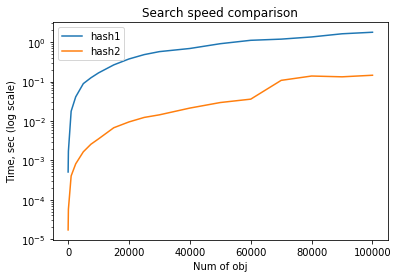

In [111]:
import matplotlib.pyplot as plt 
plt.title('Search speed comparison')
plt.yscale('log')
plt.plot(x,y1,label="hash1") 
plt.plot(x,y2,label="hash2")
plt.legend(loc='upper left')
plt.xlabel('Num of obj')
plt.ylabel('Time, sec (log scale)')

### Как видно из графиков, по первому хэшу элемент находится дольше, чем по второму, это соответствует  тому, первая хэш-функция менее эффективна, чем вторая

### Теперь рассмотрим вопрос о числе коллизий

In [103]:
x=[]
y1=[]
y2=[]
def testk(n):
    # принимает число n, генерерут массив из n объектов, создает хэш-таблицы для каждой хэш-функции,
    # c их помощью считает число коллизий для каждой хэш-функции
    sp = generate(n)
    h1 = hash_table1(sp)
    h2 = hash_table2(sp)
    k1=0
    k2=0
    
    for i in h1:
        if len(h1[i]) > 1:
            s=[]
            for k in h1[i]:
                if k.Name not in s:
                    s.append(k.Name)
            k1 = k1 + len(s) - 1
    
    for i in h2:
        if len(h2[i]) > 1:
            s=[]
            for k in h2[i]:
                if k.Name not in s:
                    s.append(k.Name)
            k2 = k2 + len(s) - 1
    
    y1.append(k1)
    y2.append(k2)
    x.append(n)

In [104]:
testk(100) 
testk(1000)
testk(2500) 
testk(5000) 
testk(7500)
testk(10000)
testk(12500)
testk(15000)
testk(17500)
testk(20000)
testk(25000)
testk(30000)
testk(40000)
testk(50000)
testk(60000)
testk(70000)
testk(80000)
testk(90000)
testk(100000)

Text(0, 0.5, 'Num col')

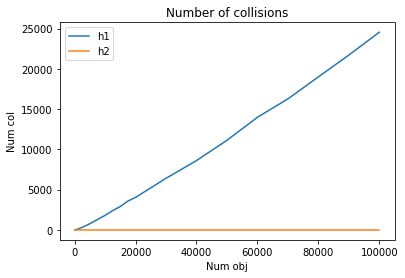

In [105]:
plt.title('Number of collisions')
plt.plot(x,y1,label="h1")
plt.plot(x,y2,label="h2")
plt.legend(loc='upper left')
plt.xlabel('Num obj')
plt.ylabel('Num col')